In [705]:
from fastapi import Request, FastAPI, Response
from typing import Any, Dict, AnyStr, List
from datetime import datetime
from bson import json_util
import numpy as np
import pandas as pd
import requests
import json
from scipy.stats import norm
from mlxtend.preprocessing import TransactionEncoder

In [23]:
header={'Content-Type': 'application/json',
      'api-key': 'api-key_bb93997d9f18e0d4cf8117d4'}

In [745]:
url = 'http://127.0.0.1:8000/analyse/data_model'
doc =  requests.get(url)
doc = doc.json()

In [746]:
print(doc)

[{'_id': {'$oid': '65d17384cce8a11773bbaca1'}, 'identifier': 5893643, 'heartbeat': 163, 'X': 0, 'Y': 19, 'Z': 11, 'time': '21:38:58.933'}, {'_id': {'$oid': '65d17384cce8a11773bbaca2'}, 'identifier': 5893643, 'heartbeat': 165, 'X': 0, 'Y': 19, 'Z': 10, 'time': '21:39:02.986'}, {'_id': {'$oid': '65d17384cce8a11773bbaca3'}, 'identifier': 5893643, 'heartbeat': 167, 'X': -3, 'Y': 20, 'Z': 15, 'time': '21:39:02.986'}, {'_id': {'$oid': '65d17384cce8a11773bbaca4'}, 'identifier': 5893643, 'heartbeat': 132, 'X': 5, 'Y': 18, 'Z': 8, 'time': '21:39:07.007'}, {'_id': {'$oid': '65d17384cce8a11773bbaca5'}, 'identifier': 8673359, 'heartbeat': 139, 'X': -3, 'Y': 16, 'Z': 0, 'time': '21:39:11.025'}, {'_id': {'$oid': '65d17384cce8a11773bbaca6'}, 'identifier': 8673359, 'heartbeat': 131, 'X': 0, 'Y': 19, 'Z': 1, 'time': '21:39:15.069'}, {'_id': {'$oid': '65d17384cce8a11773bbaca7'}, 'identifier': 8673359, 'heartbeat': 150, 'X': 0, 'Y': 22, 'Z': 1, 'time': '21:39:19.114'}, {'_id': {'$oid': '65d17384cce8a1177

In [747]:
data_f = json_util.dumps(doc) 
data = pd.read_json(data_f)

/var/folders/jc/cf24y5qn29gbw1930dkhgdmm0000gn/T/ipykernel_6326/2462899896.py:2: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_json(data_f)


In [748]:
data.head(10)

,_id,identifier,heartbeat,X,Y,Z,time
0,{'$oid': '65d17384cce8a11773bbaca1'},5893643,163,0,19,11,21:38:58.933
1,{'$oid': '65d17384cce8a11773bbaca2'},5893643,165,0,19,10,21:39:02.986
2,{'$oid': '65d17384cce8a11773bbaca3'},5893643,167,-3,20,15,21:39:02.986
3,{'$oid': '65d17384cce8a11773bbaca4'},5893643,132,5,18,8,21:39:07.007
4,{'$oid': '65d17384cce8a11773bbaca5'},8673359,139,-3,16,0,21:39:11.025
5,{'$oid': '65d17384cce8a11773bbaca6'},8673359,131,0,19,1,21:39:15.069
6,{'$oid': '65d17384cce8a11773bbaca7'},8673359,150,0,22,1,21:39:19.114
7,{'$oid': '65d17384cce8a11773bbaca8'},8673359,136,3,35,1,21:39:23.136
8,{'$oid': '65d17384cce8a11773bbaca9'},8673359,145,0,28,2,21:39:31.211
9,{'$oid': '65d17384cce8a11773bbacaa'},8673359,136,10,18,7,21:39:35.234


In [730]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         25 non-null     object
 1   identifier  25 non-null     int64 
 2   heartbeat   25 non-null     int64 
 3   X           25 non-null     int64 
 4   Y           25 non-null     int64 
 5   Z           25 non-null     int64 
 6   time        25 non-null     object
dtypes: int64(5), object(2)
memory usage: 1.6+ KB


In [394]:
#Tratamento dos dados 

In [749]:
data.drop(["_id"], axis=1, inplace=True)

In [750]:
print(data)

    identifier  heartbeat   X   Y   Z           time
0      5893643        163   0  19  11   21:38:58.933
1      5893643        165   0  19  10   21:39:02.986
2      5893643        167  -3  20  15   21:39:02.986
3      5893643        132   5  18   8   21:39:07.007
4      8673359        139  -3  16   0   21:39:11.025
5      8673359        131   0  19   1   21:39:15.069
6      8673359        150   0  22   1   21:39:19.114
7      8673359        136   3  35   1   21:39:23.136
8      8673359        145   0  28   2   21:39:31.211
9      8673359        136  10  18   7   21:39:35.234
10     8673359        134  15  11  13   21:39:35.237
11     5550911        126   0  10   0   21:40:23.630
12     5550911        130  -1 -11   0   21:40:35.724
13     5550911        134   3  19   5   21:34:40.823
14     5550911        127  18  52  26  21:34:44.846 
15     5550911        134  11  10  11   21:34:48.903
16     5550911        136  -1   9   8   21:34:52.925
17     5550911        132  -3  18   8   21:35:

In [732]:
df = data.drop(["time"], axis=1, inplace=True)
r =data.corr()
print(r)

            identifier  heartbeat         X         Y         Z
identifier    1.000000  -0.171975  0.102003  0.226717 -0.334387
heartbeat    -0.171975   1.000000 -0.252092 -0.196158 -0.014570
X             0.102003  -0.252092  1.000000  0.264387  0.521437
Y             0.226717  -0.196158  0.264387  1.000000  0.523462
Z            -0.334387  -0.014570  0.521437  0.523462  1.000000


In [744]:
data.heartbeat(3, random_state=3).T

TypeError: 'Series' object is not callable

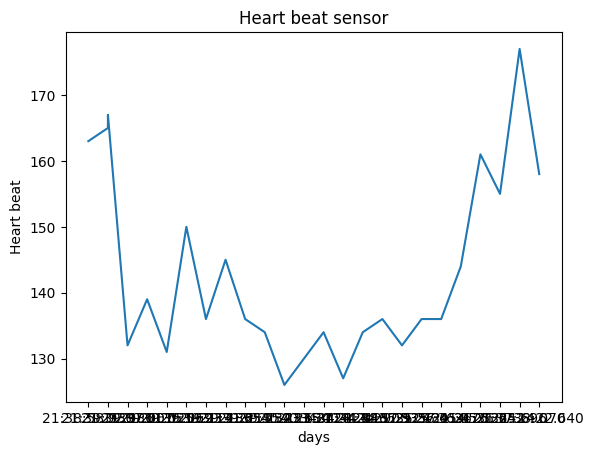

In [695]:
x =  data.time 
y = data.heartbeat
plt.title("Heart beat sensor")
plt.xlabel('days')
plt.ylabel('Heart beat')
plt.plot(x,y)
plt.show()

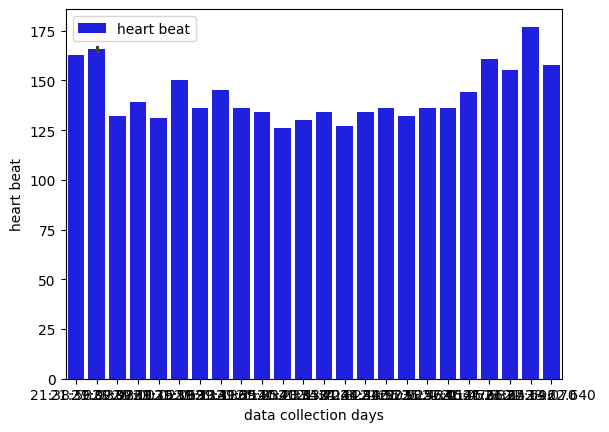

In [696]:
sns.barplot(x=data.time,
            y=data.heartbeat,              
            color="blue",                    
            label='heart beat')                     
 
plt.ylabel('heart beat')                     
plt.xlabel('data collection days')                   
plt.legend()                                 

plt.show()

/var/folders/jc/cf24y5qn29gbw1930dkhgdmm0000gn/T/ipykernel_6326/2137961597.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data.heartbeat))


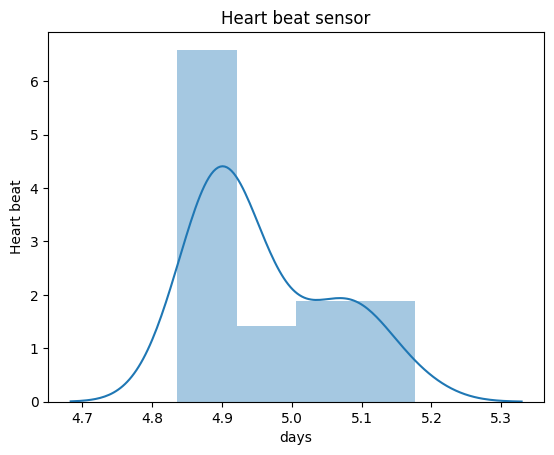

In [697]:
sns.distplot(np.log(data.heartbeat))
plt.title("Heart beat sensor")
plt.xlabel('days')
plt.ylabel('Heart beat')
plt.show()

In [698]:
data.isnull().sum()

identifier    0
heartbeat     0
X             0
Y             0
Z             0
time          0
dtype: int64

In [308]:
#Observação dos dados

In [699]:
data.shape

(25, 6)

In [700]:
occ = data['heartbeat'].value_counts()
occ

heartbeat
136    5
134    3
132    2
126    1
177    1
155    1
161    1
144    1
127    1
130    1
163    1
165    1
145    1
150    1
131    1
139    1
167    1
158    1
Name: count, dtype: int64

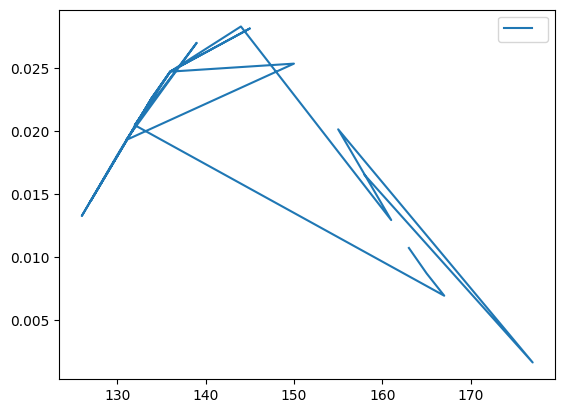

In [701]:
#Distribuição Normal do acerelorometro
pdf = norm.pdf(data.heartbeat, np.mean(data.heartbeat), np.std(data.heartbeat))
plt.plot(data.heartbeat, pdf)
plt.legend(('', ''))
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/jc/cf24y5qn29gbw1930dkhgdmm0000gn/T/ipykernel_6326/453342374.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.log(data.X), bins=18, label = 'axis X')


ValueError: supplied range of [-inf, 2.8903717578961645] is not finite

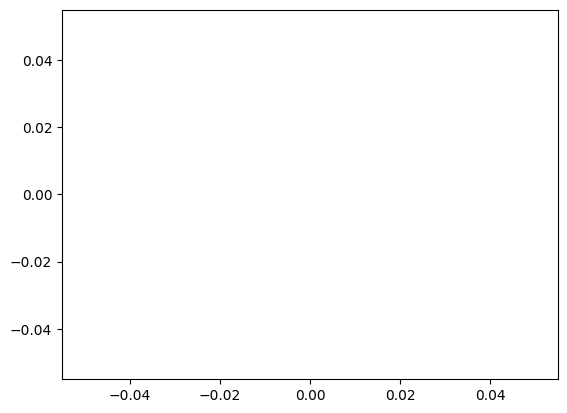

In [702]:
#Distribuição Normal do acerelorometro

ax = sns.distplot(np.log(data.X), bins=18, label = 'axis X')
ax = sns.distplot(np.log(data.Y), bins=18, label = 'axis Y')
ax = sns.distplot(np.log(data.Z), bins=18, label = 'axis Z')

sns.distplot(np.log(data.X))
sns.distplot(np.log(data.Y))
sns.distplot(np.log(data.Z))
plt.xlabel('Moviments')
plt.ylabel('')
ax.legend()
plt.show()

In [703]:
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [379]:
data.columns

Index(['identifier', 'heartbeat', 'X', 'Y', 'Z', 'date', 'time'], dtype='object')

In [408]:
data.drop(["time", "date"], axis=1, inplace=True)

In [409]:
data.head()

,identifier,heartbeat,X,Y,Z
0,5893643,104,123,82,567
1,5893643,167,154,79,81
2,5893643,104,123,82,567
3,5893643,167,154,79,81
4,5893643,104,145,87,90


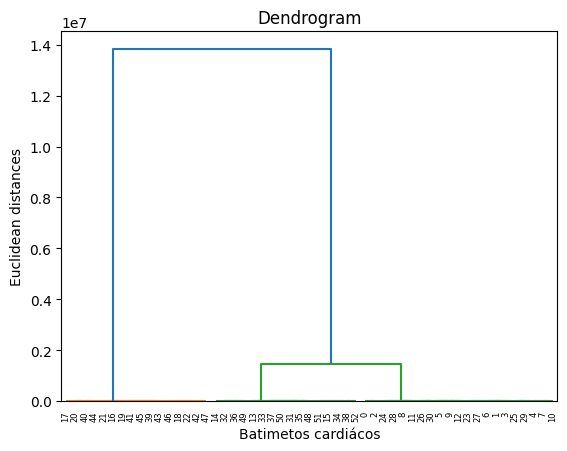

In [410]:
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Batimetos cardiácos')
plt.ylabel('Euclidean distances')
plt.show()

Text(0, 0.5, 'sepal length in cm')

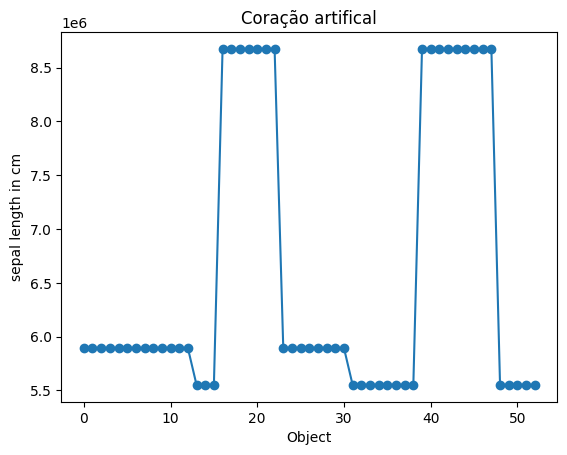

In [411]:
fig, ax = plt.subplots()
ax.plot(data.iloc[: ,0], marker="o")
ax.set_title("Coração artifical")
ax.set_xlabel("Object")
ax.set_ylabel("sepal length in cm")

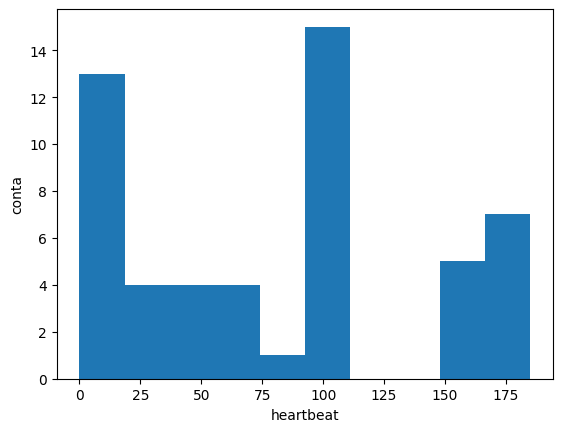

In [465]:
plt.hist(data.heartbeat)
plt.xlabel('heartbeat')
plt.ylabel('conta')
plt.show()

In [650]:
#Covariância e Correlação de Pearson
r = data.corr()
print(r)

ValueError: could not convert string to float: '11:54:35'

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.distplot(data.heartbeat[data['heartbeat']==167], color='orange', hist=False, kde=True, label='alto')
sns.distplot(data.heartbeat[data['heartbeat']==104], color='blue', hist=False, kde=True, label='baixo')
plt.title('heartbeat')

plt.subplot(1,3,2)
sns.distplot(data.X[data['X']==144], color='orange', hist=False, kde=True, label='alto')
sns.distplot(data.X[data['X']==16], color='blue', hist=False, kde=True, label='baixo')
plt.title('exio X')

plt.subplot(1,3,3)
sns.distplot(data.Y[data['Y']==82], color='orange', hist=False, kde=True, label='alto')
sns.distplot(data.Y[data['Y']==79], color='blue', hist=False, kde=True, label='baixo')
plt.title('exio Y')

#plt.subplot(1,3,3)
#sns.distplot(data.Z[data['Z']==567], color='orange', hist=False, kde=True, label='alto')
#sns.distplot(data.Z[data['Z']==70], color='blue', hist=False, kde=True, label='baixo')
#plt.title('exio Z')

plt.show()

#Aplicando Matrix de Correlação

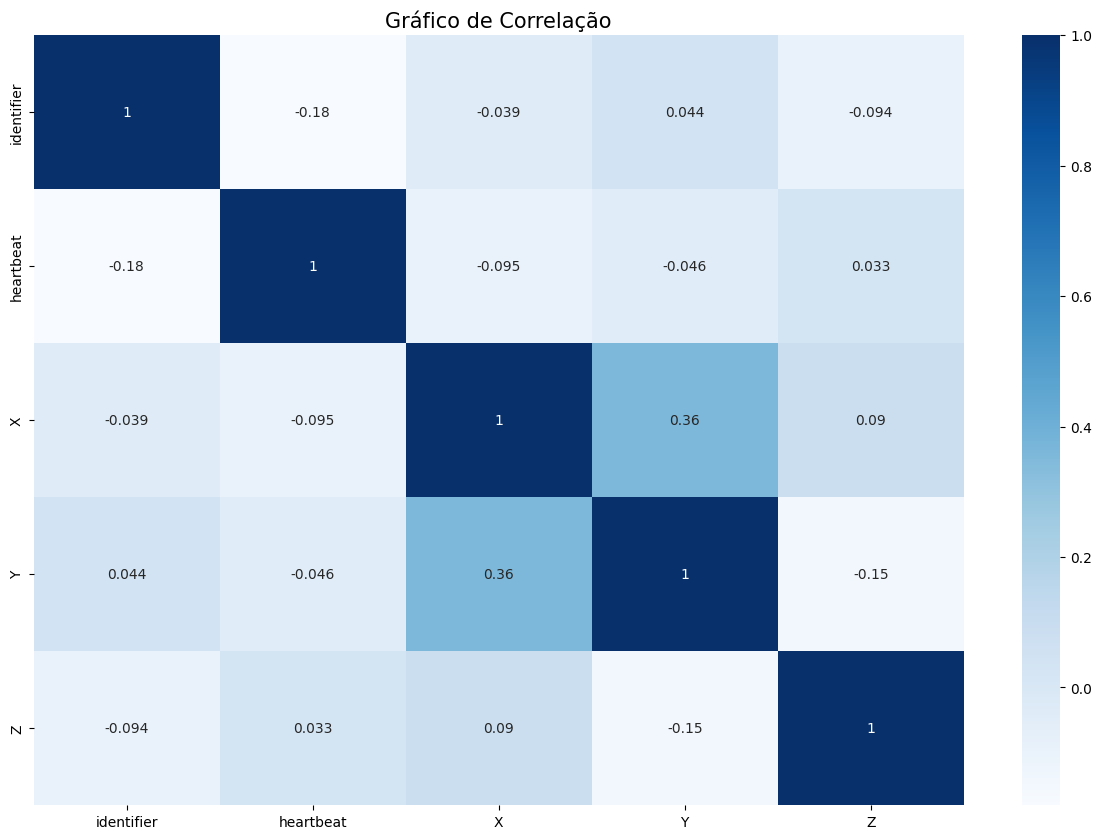

In [417]:
plt.figure(figsize=(15, 10))
corr = sns.heatmap (data.corr(), cmap = 'Blues', annot = True)
corr.set_title('Gráfico de Correlação', fontsize = 15)
plt.show()

In [ ]:
#Treinar 

In [418]:
X = data
y = data['heartbeat']
target = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

lr = LinearRegression()
tr = lr.fit(X_train, y_train)

In [ ]:
#Arvor de decisão

In [419]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=3)

clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.5476190476190477

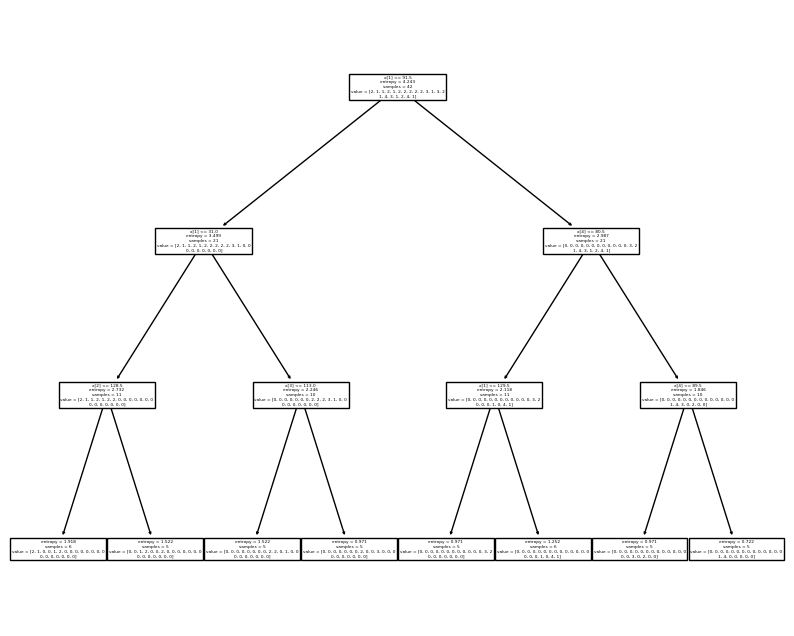

In [420]:
fig, ax = plt.subplots(figsize=(10,8))
tree.plot_tree(clf)
plt.show()